<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/climatologia/src/chucuri/Climatologia_Temperatura_Chucuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
NOMBRE_ESTACION = 'chucuri'

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_temp.csv'



In [7]:
#Read the data

df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS,
                 sep = ';', 
                #  parse_dates = ["FECHA"],
                #  date_parser = lambda col: pd.to_datetime(col)
                )

In [11]:
df['MES'] = df['FECHA'].apply(lambda x: x[5:7])
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

In [47]:
xnr = ['12', '01', '02', '06', '07', '08']
nrain = df[df['MES'].str.contains('|'.join(xnr))]
ndf = nrain.groupby('HORA', group_keys=False).agg({'TEMP' : ['mean', 'std']}).reset_index(level=0)
ndf['mean'] = ndf[('TEMP', 'mean')]
ndf['std'] = ndf[('TEMP', 'std')]
nrain = ndf[['HORA', 'mean', 'std']]

In [48]:
#Start every matrix
## The matrix have 24 rows (hours of the day) and 12 columns (every station)

nr_season = np.ones([24]) # Matrix for the no raining season mean
r_season = np.ones([24]) # Matrix for the raining season mean
snr_season = np.ones([24]) # Matrix for the no raining season std
sr_season = np.ones([24]) # Matrix for the raining season std

#Separate the seasons in dataframes
##Start the dataframes
nrain = pd.DataFrame()
rain = pd.DataFrame()
##Iniciate the month in every season
xnr = ['12', '01', '02', '06', '07', '08']
xr = ['03', '04', '05', '09', '10', '11']
##y is to make the hourly calculation
y = np.arange(0,24)

##Merge the dataframe, so that it will be only one for every season
nrain = df[df['MES'].str.contains('|'.join(xnr))] # DF con los datos de meses sin lluvia
rain = df[df['MES'].str.contains('|'.join(xr))]   # DF con los datos de meses con lluvia


#Fill the matrix of the no raining season
nrdf = nrain.groupby('HORA', group_keys=False).agg({'TEMP' : ['mean', 'std']}).reset_index(level=0)
nrdf['mean'] = nrdf[('TEMP', 'mean')]
nrdf['std'] = nrdf[('TEMP', 'std')]
nrain = nrdf[['HORA', 'mean', 'std']]


#Do the same for the the raining season
rdf = rain.groupby('HORA', group_keys=False).agg({'TEMP' : ['mean', 'std']}).reset_index(level=0)
rdf['mean'] = rdf[('TEMP', 'mean')]
rdf['std'] = rdf[('TEMP', 'std')]
rain = rdf[['HORA', 'mean', 'std']]
    
# Notice that, if you want the values of a station you need to write nr_season[:,0]
# Where 0 is the value of the first station of your file in this case, Suba

Text(0, 0.5, 'Temperatura')

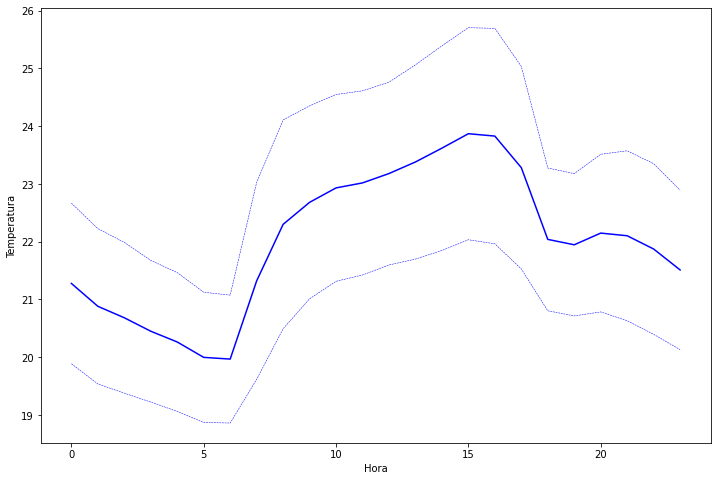

In [49]:
#I made a plot in a very automatic way, you need to improve it, I think a plot matrix es better, but you need to check
plt.figure(figsize = (12,8))
color = ['b','orange', 'red', 'darkcyan', 'purple', 'k', 'brown', 'royalblue', 'b','orange', 'red', 'darkcyan']


plt.plot(rain['mean'], color = 'b')
plt.plot(rain['mean'] + rain['std'], color = 'b', linestyle = '--', linewidth = 0.5)
plt.plot(rain['mean'] - rain['std'], color = 'b', linestyle = '--', linewidth = 0.5)

plt.xlabel("Hora")
plt.ylabel("Temperatura")